**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `dir_montar` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
dir_montar=<ruta completa de mi máquina a mi directorio>#aquí colocar la ruta al directorio a montar, por ejemplo: 
#dir_montar=/Users/erick/midirectorio.
```

Ejecutar:

```
$docker run --rm -v $dir_montar:/datos --name jupyterlab_prope_r_kernel_tidyverse -p 8888:8888 -d palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4   

```

Ir a `localhost:8888` y escribir el password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_prope_r_kernel_tidyverse
```


Documentación de la imagen de docker `palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/prope_r_kernel_tidyverse).

---

Para ejecución de la nota usar:

[docker](https://www.docker.com/) (instalación de forma **local** con [Get docker](https://docs.docker.com/install/)) y ejecutar comandos que están al inicio de la nota de forma **local**. 

O bien dar click en alguno de los botones siguientes:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/palmoreck/dockerfiles-for-binder/jupyterlab_prope_r_kernel_tidyerse?urlpath=lab/tree/Propedeutico/Python/clases/3_algebra_lineal/1_ecuaciones_lineales.ipynb) esta opción crea una máquina individual en un servidor de Google, clona el repositorio y permite la ejecución de los notebooks de jupyter.

[![Run on Repl.it](https://repl.it/badge/github/palmoreck/dummy)](https://repl.it/languages/python3) esta opción no clona el repositorio, no ejecuta los notebooks de jupyter pero permite ejecución de instrucciones de Python de forma colaborativa con [repl.it](https://repl.it/). Al dar click se crearán nuevos ***repl*** debajo de sus users de ***repl.it***.


## Lo siguiente está basado en el capítulo 2 y apéndice del libro de texto de J. Kiusalas Numerical Methods in Engineering with Python 3 y el libro de Matrix Analysis and Applied Linear Algebra de C. D. Meyer.

**Se sugiere haber revisado la sección 1.5 del libro de texto de J. Kiusalas Numerical Methods in Engineering with Python 3: uso de *NumPy***

# Sistemas de ecuaciones lineales

En general son de la forma: $$\begin{array}{ccc} a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n  &= & b_1 \\ a_{21}x_1 + a_{22}x_2 +  \cdots + a_{2n}x_n &= & b_2 \\ \vdots & & \\ a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n &=& b_m \end{array}$$

donde: las $x_i$'s son las incógnitas y las $a_{ij}$'s y $b_i$'s son constantes conocidas.

Las entradas $a_{ij}$'s son llamadas coeficientes del sistema y el conjunto de $b_i$'s se le llama lado derecho del sistema. Si todas las $b_i$'s son iguales a $0$ el sistema se le nombra **homogéneo**.

**3 posibilidades para solución del sistema anterior:**

* Una única solución: sólo existe uno y sólo un conjunto de valores de $x_i$'s que satisfacen todas las ecuaciones simultáneamente.

* Ninguna solución: no existe ningún conjunto de valores de $x_i$'s que satisfacen todas las ecuaciones simultáneamente (el conjunto solución es vacío).

* Infinitas soluciones: hay una infinidad de conjuntos (distintos) de valores de las $x_i$'s que satisfacen todas las ecuaciones simultáneamente.


---

**Definición**


En el caso de una o infinitas soluciones el sistema de ecuaciones lineales se nombra consistente o no singular, si no existe solución se nombra inconsistente o singular.


---

## Interpretación geométrica

Resolver un sistema de ecuaciones lineales equivale a encontrar la intersección entre rectas, planos o hiperplanos (2,3 o n dimensiones respectivamente). Por ejemplo para un caso de dos dimensiones se tiene:

<img src="https://dl.dropboxusercontent.com/s/p92z7zlquo1adbm/algebra_lineal_1.jpg?dl=0" heigth="700" width="700">


El inciso a) representa un sistema de ecuaciones lineales sin solución, el inciso b) infinitas soluciones (en el dibujo ligeramente se desplazó hacia abajo una de las rectas para mostrar ambas) y el inciso c) una única solución. 

## Algoritmos

Existen una gran cantidad de algoritmos para resolver los sistemas de ecuaciones. Típicamente se elige el algoritmo de acuerdo a las características de los coeficientes de la matriz del sistema y sus dimensiones.

### Sistemas triangulares

Son sistemas cuya matriz es triangular inferior o superior. Un sistema triangular inferior se resuelve con el método de sustitución hacia delante. Si es triangular superior se resuelve con el método de sustitución hacia atrás.


### Ejemplo matriz triangular inferior

In [1]:
import numpy as np

In [2]:
np.ones((4,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [3]:
np.ones((4,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [4]:
np.tril(np.ones(4))

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [5]:
np.tril(np.ones((4,4)))

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

### Ejemplo matriz triangular superior

In [6]:
np.triu(np.ones(4))

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

In [7]:
np.triu(np.ones((4,4)))

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

### Sistemas no triangulares

Para sistemas de ecuaciones lineales más generales (no tienen estructura identificable) se tienen métodos iterativos y directos o basados en factorizaciones matriciales.

Entre los directos o basados en factorizaciones matriciales se encuentran:


* Eliminación Gaussiana o factorización LU.
* Factorización de Cholesky (la matriz del sistema debe ser simétrica definida positiva).
* Factorización QR.
* Descomposición en valores singulares o SVD por sus siglas en inglés.

y como ejemplo de métodos iterativos están:

* Jacobi.
* Gauss-Seidel.
* Gradiente conjugado.



Ambos métodos: iterativos y directos o basados en factorizaciones matriciales encuentran sistemas de ecuaciones equivalentes a partir de operaciones básicas del álgebra lineal.

---

**Definición**

Dos sistemas de ecuaciones lineales son equivalentes si tienen el mismo conjunto solución.

---

### Algoritmos iterativos para sistemas de ecuaciones lineales generales

A diferencia de los algoritmos directos que utilizan un número finito de pasos para resolver un sistema de ecuaciones lineales, esta clase de algoritmos utilizan un punto inicial y con un proceso iterativo van mejorando la solución hasta que se satisfaga un criterio de paro. Típicamente tienen un desempeño más lento que los directos pero aprovechan mejor la estructura de las matrices. Dependiendo de las características de las matrices convergen o no a la solución.

Revisar los siguientes algoritmos que encuentran en la sección 2.7 del libro de texto de J. Kiusalas Numerical Methods in Engineering with Python 3:

* Gauss-Seidel.
* Gradiente conjugado.


### Ejemplos de uso de los paquetes *NumPy* y *SciPy* para resolver ecuaciones lineales

1)Resolver: $$\begin{array}{ccc} 8x_1 -6x_2 + 2x_3  &= & 28 \\ -4x_1 + 11x_2 -7x_3 &= & -40 \\ 4x_1 -7x_2 + 6x_3 &=& 33\end{array} $$

In [8]:
import numpy as np
import pprint

In [9]:
A = np.array([[8, -6, 2], 
              [-4, 11, -7], 
              [4, -7, 6]])
b = np.array([28,-40,33])

In [10]:
print('A:')
pprint.pprint(A)
print('b:')
pprint.pprint(b)

A:
array([[ 8, -6,  2],
       [-4, 11, -7],
       [ 4, -7,  6]])
b:
array([ 28, -40,  33])


Usamos la función de [solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) dentro de [numpy.linalg](https://numpy.org/doc/stable/reference/routines.linalg.html)

In [11]:
x=np.linalg.solve(A,b)

In [12]:
print('x:')
pprint.pprint(x)

x:
array([ 2., -1.,  3.])


In [13]:
print('Verificando resultado Ax = b')
print('b:')
pprint.pprint(b)
print('Ax:')
pprint.pprint(A@x)

Verificando resultado Ax = b
b:
array([ 28, -40,  33])
Ax:
array([ 28., -40.,  33.])


¿Cómo verificamos que son iguales las cantidades?
**1era opción**

In [14]:
!pip3 install -q --user pytest

In [15]:
from pytest import approx

In [16]:
sol_numpy = A@x

In [17]:
sol_numpy

array([ 28., -40.,  33.])

In [18]:
b 

array([ 28, -40,  33])

In [19]:
sol_numpy == approx(b)

True

**2a opción**

In [20]:
np.allclose(sol_numpy, b)

True

2)Resolver $AX = B$ 

$$\begin{array}{l}
\left[
\begin{array}{ccc}
6 &4 &1\\
-4 & 6 & -4\\
1 &-4 & 6
\end{array}
\right]
\left[
\begin{array}{cc}
x_{11} &x_{12} \\
x_{21} & x_{22}\\
x_{31} & x_{32}
\end{array}
\right]
=
\left[\begin{array}{cc}
-14 & 22\\
36 & -18\\
6 & 7
\end{array}
\right] 
\end{array}
$$

In [21]:
A = np.array([[6,-4,1], 
              [-4,6,-4], 
              [1,-4,6]])
B = np.array([[-14,22],
              [36,-18],
              [6,7]])

In [22]:
print('A:')
pprint.pprint(A)
print('B:')
pprint.pprint(B)

A:
array([[ 6, -4,  1],
       [-4,  6, -4],
       [ 1, -4,  6]])
B:
array([[-14,  22],
       [ 36, -18],
       [  6,   7]])


In [23]:
X=np.linalg.solve(A,B)

In [24]:
print('X:')
pprint.pprint(X)

X:
array([[10.,  3.],
       [22., -1.],
       [14.,  0.]])


In [25]:
print('Verificando resultado AX = B')
print('B:')
pprint.pprint(B)
print('AX:')
pprint.pprint(A@X)

Verificando resultado AX = B
B:
array([[-14,  22],
       [ 36, -18],
       [  6,   7]])
AX:
array([[-14.,  22.],
       [ 36., -18.],
       [  6.,   7.]])


### Ejemplo factorización PLU

**¿Dado el sistema $Ax=b$, $A \in \mathbb{R}^{n \times n}$ cómo se resuelve con la factorización $PLU$?**

Paso 1: encontrar factores $P,L,U$ tales que $PA=LU$.

Paso 2: resolver con el método de sustitución hacia delante el sistema triangular inferior $Ld=Pb$.

Paso 3: resolver con el método de sustitución hacia atrás el sistema triangular superior $Ux=d$.

**Ejemplo:**

Obtener los factores $P, L, U$ de la matriz $A$: $$A = \begin{bmatrix} 2& -1&2 \\ 1& 6& -1 \\ 1& 4& 1\end{bmatrix}$$ 

y utilizarlos para resolver $AX = B$ con $$B=\begin{bmatrix}7 & -1\\13 & 6\\5 & 7\end{bmatrix}$$

La factorización P,L,U la calculamos con la función [lu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html) dentro de [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html).

In [26]:
import scipy
import scipy.linalg 

In [27]:
A = np.array([[2,-1,2], [1,6,-1], [1,4,1]])
A

array([[ 2, -1,  2],
       [ 1,  6, -1],
       [ 1,  4,  1]])

In [28]:
P, L, U = scipy.linalg.lu(A)

In [29]:
print('A:')
pprint.pprint(A)
print('P:')
pprint.pprint(P)
print('L:')
pprint.pprint(L)
print('U:')
pprint.pprint(U)

A:
array([[ 2, -1,  2],
       [ 1,  6, -1],
       [ 1,  4,  1]])
P:
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
L:
array([[1.        , 0.        , 0.        ],
       [0.5       , 1.        , 0.        ],
       [0.5       , 0.69230769, 1.        ]])
U:
array([[ 2.        , -1.        ,  2.        ],
       [ 0.        ,  6.5       , -2.        ],
       [ 0.        ,  0.        ,  1.38461538]])


In [30]:
print('Verificando que es igual PA al producto LU')
print('L*U:')
pprint.pprint(L@U)
print('P*A')
pprint.pprint(P@A)

Verificando que es igual PA al producto LU
L*U:
array([[ 2., -1.,  2.],
       [ 1.,  6., -1.],
       [ 1.,  4.,  1.]])
P*A
array([[ 2., -1.,  2.],
       [ 1.,  6., -1.],
       [ 1.,  4.,  1.]])


In [31]:
print('Usando los factores P,L,U para resolver AX = B')
B = np.array([[7,-1],[13,6],[5,7]])

B

Usando los factores P,L,U para resolver AX = B


array([[ 7, -1],
       [13,  6],
       [ 5,  7]])

Resolvemos paso 2: $LD = PB$

In [32]:
D = scipy.linalg.solve_triangular(L,P@B,lower=True)
D

array([[ 7.        , -1.        ],
       [ 9.5       ,  6.5       ],
       [-5.07692308,  3.        ]])

Resolver paso 3: $UX = D$

In [33]:
X = scipy.linalg.solve_triangular(U,D) #by default parameter lower is False


In [34]:
print('X:')
pprint.pprint(X)

X:
array([[ 7.33333333, -1.83333333],
       [ 0.33333333,  1.66666667],
       [-3.66666667,  2.16666667]])


In [35]:
print('Verificando resultado AX = B')
print('B:')
pprint.pprint(B)
print('AX:')
pprint.pprint(A@X)

Verificando resultado AX = B
B:
array([[ 7, -1],
       [13,  6],
       [ 5,  7]])
AX:
array([[ 7., -1.],
       [13.,  6.],
       [ 5.,  7.]])


---

**Nota**

En la factorización LU, la matriz $P$ es una matriz de permutación que cumple con tener un $1$ exactamente en cada renglón y cada columna. Por ejemplo:

$$
\left[
\begin{array}{ccc}
0 & 1 & 0\\
1 & 0 & 0\\
0 & 0 & 1
\end{array}
\right ]
$$

---

### Ejemplo anterior utilizando la factorización QR

**¿Dado el sistema $Ax=b$, $A \in \mathbb{R}^{n \times n}$ cómo se resuelve con la factorización $QR$?**

Paso 1: encontrar factores $Q,R$ tales que $A=QR$. 

Paso 2: resolver con el método de sustitución hacia atrás el sistema triangular superior $Rx=Q^Tb$.


In [36]:
Q, R = np.linalg.qr(A)

In [37]:
print('A:')
pprint.pprint(A)
print('Q:')
pprint.pprint(Q)
print('R:')
pprint.pprint(R)


A:
array([[ 2, -1,  2],
       [ 1,  6, -1],
       [ 1,  4,  1]])
Q:
array([[-0.81649658,  0.56354707, -0.12549116],
       [-0.40824829, -0.71724173, -0.56471022],
       [-0.40824829, -0.40985242,  0.81569255]])
R:
array([[-2.44948974, -3.26598632, -1.63299316],
       [ 0.        , -6.5064071 ,  1.43448345],
       [ 0.        ,  0.        ,  1.12942045]])


$Q^TQ = I$

Norma de la primer columna de Q:

In [38]:
np.linalg.norm(Q[:,0])

0.9999999999999999

Norma de la segunda columna de Q:

In [39]:
np.linalg.norm(Q[:,1])

0.9999999999999999

Norma de la tercera columna de Q:

In [40]:
np.linalg.norm(Q[:,2])

1.0

Producto punto entre primera y segunda columna de Q:

In [41]:
Q[:,0].dot(Q[:,1])

-2.7755575615628914e-17

$QQ^T = I$

Producto punto entre primer y segundo renglón de Q:

In [42]:
Q[0,:].dot(Q[1,:])

1.5265566588595902e-16

Producto punto entre segundo y tercer renglón de Q:

In [43]:
Q[1,:].dot(Q[2,:])

-5.551115123125783e-17

Norma de primer renglón:

In [44]:
np.linalg.norm(Q[0,:])

0.9999999999999999

Norma de segundo renglón:

In [45]:
np.linalg.norm(Q[1,:])

0.9999999999999999

Norma de tercer renglón:

In [46]:
np.linalg.norm(Q[2,:])

0.9999999999999999

In [47]:
Q@Q.T == approx(np.eye(3))

True

In [48]:
Q.T@Q == approx(np.eye(3))

True

In [49]:
print('Verificando que es igual A al producto QR')
print('QR:')
pprint.pprint(Q@R)
print('A')
pprint.pprint(A)

Verificando que es igual A al producto QR
QR:
array([[ 2., -1.,  2.],
       [ 1.,  6., -1.],
       [ 1.,  4.,  1.]])
A
array([[ 2, -1,  2],
       [ 1,  6, -1],
       [ 1,  4,  1]])


Resolvemos: $ RX = Q^T B$

In [50]:
print('Usando los factores Q,R para resolver AX = B')
X = scipy.linalg.solve_triangular(R, Q.T@B) #by default parameter lower is False


Usando los factores Q,R para resolver AX = B


In [51]:
print('X:')
pprint.pprint(X)

X:
array([[ 7.33333333, -1.83333333],
       [ 0.33333333,  1.66666667],
       [-3.66666667,  2.16666667]])


In [52]:
print('Verificando resultado AX = B')
print('B:')
pprint.pprint(B)
print('AX:')
pprint.pprint(A@X)

Verificando resultado AX = B
B:
array([[ 7, -1],
       [13,  6],
       [ 5,  7]])
AX:
array([[ 7., -1.],
       [13.,  6.],
       [ 5.,  7.]])


**(Tarea) Ejercicio: resolver sistemas de ecuaciones lineales $Ax = b$ con la factorización P,L,U y QR. Para esto crear un módulo con nombre `solve_linear_system_of_equations.py` y colocar en tal módulo las siguientes funciones de Python:**

Para factorización `PLU`:

```
def PLU(matrix, rhs):
    """
    Compute numerical approximation to linear system of equations Ax=b using
    factorization PLU via scipy.
    Args:
        matrix (numpy 2d array of floats): Square system matrix.
        rhs (numpy 1d array of floats): Right hand side of linear system of equations.
    Returns:
        x (numpy 1d array of floats or string): solution of Ax=b if A is square, if not returns string 
        "System matrix must be square"
    """
```

Para factorización `QR`:

```
def QR(matrix, rhs):
    """
    Compute numerical approximation to linear system of equations Ax=b using
    factorization QR via numpy.
    Args:
        matrix (numpy 2d array of floats): Square system matrix.
        rhs (numpy 1d array of floats): Right hand side of linear system of equations.
    Returns:
        x (numpy 1d array of floats or string): solution of Ax=b if A is square, if not returns string 
        "System matrix must be square"
    """
```

**La implementación de ambas funciones deben realizar un chequeo de dimensiones (ver *docstring* anteriores para saber qué mensaje deben regresar si la matriz del sistema no es cuadrada)**.

### Ejemplos de uso del paquete *SymPy* para resolver ecuaciones lineales

1)Considérese las variables $x,y$ del siguiente sistema y resuélvase con *SymPy* para $p, q$ constantes arbitrarias.

$$
\begin{array}{ccc}
x +  py &=& b_1 \\
qx + y &=& b_2
\end{array}
$$

Podemos reescribir este sistema como:

$$\begin{array}{l}
\left[
\begin{array}{cc}
1 &p\\
q & 1\\
\end{array}
\right]
\left[
\begin{array}{c}
x \\
y
\end{array}
\right]
=
\left[\begin{array}{c}
b_1 \\
b_2 \\
\end{array}
\right] 
\end{array}
$$

In [53]:
import sympy

In [54]:
p,q = sympy.symbols("p, q")

In [55]:
M = sympy.Matrix([[1, p],
                  [q, 1]])

In [56]:
M

Matrix([
[1, p],
[q, 1]])

In [57]:
b1, b2 = sympy.symbols("b1, b2")

In [58]:
b = sympy.Matrix([b1,b2])

In [59]:
b

Matrix([
[b1],
[b2]])

In [60]:
M.solve(b)

Matrix([
[(-b1 + b2*p)/(p*q - 1)],
[ (b1*q - b2)/(p*q - 1)]])

2)El sistema:



$$
\begin{array}{l}
Ax=\left [
\begin{array}{cc}
1 & -3 \\
-2 & 6
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2
\end{array}
\right ]
=
\left [
\begin{array}{c}
-1 \\
2
\end{array}
\right ]
=b
\end{array}
$$

tiene infinitas soluciones, su conjunto solución está dado por:

$$S = 
\left \{
\left [ 
\begin{array}{c}
-1 + 3t \\
t\\
\end{array}
\right ] | t \in \mathbb{R}
\right \}
=
\left \{
\left [ 
\begin{array}{c}
-1\\
0\\
\end{array} 
\right ]
+ 
t\left [
\begin{array}{c}
3\\
1\\
\end{array}
\right ] | t \in \mathbb{R}
\right \}
$$

**Verificamos lo anterior con *SymPy*.**

In [61]:
x_vars = sympy.symbols("x1, x2")

In [62]:
A = sympy.Matrix([[1, -3],
                  [-2, 6]])

In [63]:
x = sympy.Matrix(x_vars)

In [64]:
b = sympy.Matrix([-1, 2])

In [65]:
sympy.solve(A*x - b, x_vars)

{x1: 3*x2 - 1}

**Hacemos la gráfica con *NumPy* y *Matplotlib*.**

In [66]:
import matplotlib.pyplot as plt

In [67]:
A = np.array([[1, -3],
              [-2, 6.0]])

In [68]:
b = np.array([-1,2.0])

Algunas soluciones del sistema anterior están dadas por los siguientes puntos.

In [69]:
point1 = [-1, 0]
point2 = [0, 1/3]
point3 = [(point2[0]+point1[0])/2, 
           (point2[1] + point1[1])/2]

In [70]:
A@point1

array([-1.,  2.])

In [71]:
A@point2

array([-1.,  2.])

In [72]:
A@point3

array([-1.,  2.])

Podemos dar la solución y graficar la solución del sistema anterior que tiene mínima norma 2 o Euclidiana $||x||_2 = \sqrt{x_1^2 + x_2^2}$ utilizando *NumPy*.

**Solución que tiene mínima norma $2$ o Euclidiana con [pinv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html):**

In [73]:
point4 = np.row_stack((np.zeros(2), np.linalg.pinv(A)@b))
point4[1,:]

array([-0.1,  0.3])

In [74]:
A@point4[1,:]

array([-1.,  2.])

El siguiente punto satisface al sistema homogéneo.

In [75]:
point_homogeneous_system = [3, 1]

In [76]:
A@point_homogeneous_system

array([0., 0.])

**Gráfica.**

In [77]:
t = np.linspace(-1,1,100)

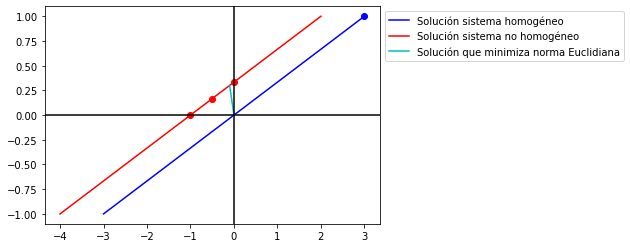

In [78]:
plt.plot(3*t, t, 'b')
plt.plot(-1+3*t, t, 'r')
plt.scatter(point_homogeneous_system[0], point_homogeneous_system[1], color='b')
plt.scatter(point1[0], point1[1], color = 'r')
plt.scatter(point2[0], point2[1], color='r')
plt.scatter(point3[0], point3[1], color = 'r')
plt.plot(point4[:,0], point4[:,1], color='c')
plt.axhline(color='k')
plt.axvline(color='k')
plt.legend(["Solución sistema homogéneo",
            "Solución sistema no homogéneo",
            "Solución que minimiza norma Euclidiana"], 
            bbox_to_anchor=(1, 1))
plt.show()

In [79]:
np.linalg.norm(point1)

1.0

In [80]:
np.linalg.norm(point2)

0.3333333333333333

In [81]:
np.linalg.norm(point3)

0.5270462766947299

In [82]:
np.linalg.norm(point4[1,:])

0.316227766016838

**El vector que tiene mínima norma $2$ es.**

In [83]:
point4[1,:]

array([-0.1,  0.3])

## Referencias:
* [numpy.linalg.solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html)
* [scipy.linalg.lu](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.lu.html)
* [scipy.linalg.solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
* [numpy.linalg.qr](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html)